**Textual analysis**

**Model:**

1. SVM

2. Decision Tree

3. Naive bayes

4. Logistic Regression

**Steps:**

I. Import libaries

II. Load data

III. Train-test-split

IV. Text vectorization

V. Fit, cross-validation, predict and evaluate

---



# **0. Import libraries**

In [215]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# **1. Load data**

In [216]:
# show file IDs
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


*It seems like there are a lot of movie reviews. So let's check its number.*

---



In [217]:
# check the number of file IDs
print(len(movie_reviews.fileids()))

2000


*There are a total 2,000 file IDs in the movie_reviews corpus.*

---



In [218]:
# check category
movie_reviews.categories()

['neg', 'pos']

In [219]:
# show the words
print(movie_reviews.words())

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]


In [220]:
# rearrange the corpus data as a list of tuple
documents = []
for i in movie_reviews.categories():
    for j in movie_reviews.fileids(i):
        try:
            words = movie_reviews.words(j)
            documents.append((list(words), i))
        except:
            print(f'Error processing file ID {j}: {e}')

In [221]:
# set a seed for the random number generator
random.seed(123)

In [222]:
# show the result
print(documents[0])

(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'b

In [223]:
# shaffle the document
random.shuffle(documents)

In [224]:
# show the document again
print(documents[0])

(['most', 'movies', 'seem', 'to', 'release', 'a', 'third', 'movie', 'just', 'so', 'it', 'can', 'be', 'called', 'a', 'trilogy', '.', 'rocky', 'iii', 'seems', 'to', 'kind', 'of', 'fit', 'in', 'that', 'category', ',', 'but', 'manages', 'to', 'be', 'slightly', 'unique', '.', 'the', 'rocky', 'formula', 'of', '"', 'rocky', 'loses', 'fight', '/', 'rocky', 'trains', '/', 'rocky', 'wins', 'fight', '"', 'is', 'carried', 'out', 'to', 'the', 'letter', '.', 'also', 'the', "'", 'tradition', "'", 'of', 'showing', 'the', 'last', 'five', 'minutes', 'or', 'so', 'from', 'the', 'past', 'rocky', 'film', 'is', 'used', 'as', 'well', '.', 'this', 'movie', 'begins', 'with', 'a', 'series', 'of', 'clips', 'showing', 'how', 'famous', 'rocky', '(', 'sylvester', 'stallone', ')', 'has', 'become', '.', '.', '.', 'even', 'showing', 'a', 'brief', 'appearance', 'on', 'sesame', 'street', '!', '!', 'then', 'it', 'moves', 'on', 'with', 'rocky', 'being', 'in', 'a', 'fixed', 'fight', 'with', 'thunderlips', '(', 'hulk', 'hoga

*It has been shaffled.*

---



In [225]:
# report the descriptive statistics
print(f'Number of reviews/documents: {len(documents)}')
print(f'Corpus size (words): {np.sum(len(a) for (a, b) in documents)}')
print('Sample text of document 1:')
print('-'*30)
print(' '.join(documents[0][0][:50]))

Number of reviews/documents: 2000
Corpus size (words): 1583820
Sample text of document 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight


<ipython-input-225-0235cc1a4ef5>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  print(f'Corpus size (words): {np.sum(len(a) for (a, b) in documents)}')


In [226]:
# check the sentiment distribution
sentiment_dis = Counter([b for (a, b) in documents])
sentiment_dis

Counter({'pos': 1000, 'neg': 1000})

# **2. Train-test-split**

In [227]:
# split into a training and a testing set
train, test = train_test_split(documents, test_size=.33, random_state=42)

In [228]:
# check the distribution of lables in the training and testing set
print(f'Training set: {Counter([b for (a, b) in train])}')
print(f'Testing set: {Counter([b for (a, b) in test])}')

Training set: Counter({'neg': 674, 'pos': 666})
Testing set: Counter({'pos': 334, 'neg': 326})


In [229]:
# X = feature vector
# y = target vector
X_train = [' '.join(a) for (a, b) in train]
X_test = [' '.join(a) for (a, b) in test]
y_train = [b for (a, b) in train]
y_test = [b for (a, b) in test]

# **3. Text vectorization**

In [230]:
# create an instance of tfidfvectorizer
tfidf = TfidfVectorizer(min_df=10, token_pattern=r'[a-zA-Z]+')

In [231]:
# fit train
X_train_bow = tfidf.fit_transform(X_train)

In [232]:
# transform test
X_test_bow = tfidf.transform(X_test)

In [233]:
# report the number of features
print(f'X train bow: {X_train_bow.shape}')
print(f'X test bow: {X_test_bow.shape}')

X train bow: (1340, 6138)
X test bow: (660, 6138)


*There are 6,138 features (unique words).*

---



# **4. Model selection and cross selection**

*1. SVM (support vector machine)*

*2. decision tree*

*3. naive bayes*

*4. logistic regression*


---



# **5. SVM**

## **5.1. Fit the model**

In [234]:
# initialize the model
model_svm = svm.SVC(C=8.0, kernel='linear')

In [235]:
# fit the model
model_svm.fit(X_train_bow, y_train)

SVC(C=8.0, kernel='linear')

## **5.2. Check the stability**

In [236]:
# perform 5-fold cross validation
model_svc_acc = cross_val_score(estimator=model_svm, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_svc_acc

array([0.84328358, 0.82089552, 0.85447761, 0.82462687, 0.84701493])

*It looks stable.*

---



## **5.3. Predict the outcome**

In [237]:
# predict
y_pred_svm = model_svm.predict(X_test_bow)
y_pred_svm[:10]

array(['pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'pos'], dtype='<U3')

# **6. Decision trees**

## **6.1. Fit the model**

In [238]:
# initilize the model
model_dec = DecisionTreeClassifier(max_depth=10, random_state=0)

In [239]:
# fit the model
model_dec.fit(X_train_bow, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

## **6.2. Check the stability**

In [240]:
# perform 5-fold cross validation
model_dec_acc = cross_val_score(estimator=model_dec, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
model_dec_acc

array([0.6641791 , 0.64179104, 0.66791045, 0.64179104, 0.6380597 ])

*It looks stable.*

---



## **6.3. Predict the outcome**

In [241]:
# predict
y_pred_dec = model_dec.predict(X_test_bow)
y_pred_dec[:10]

array(['pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg',
       'neg'], dtype='<U3')

# **7. Naive bayes**

## **7.1. Fit the model**

In [242]:
# initialize the model
model_gnb = GaussianNB()

In [243]:
# fit the model
model_gnb.fit(X_train_bow.toarray(), y_train)

GaussianNB()

## **7.2. Check the stabiltiy**

In [244]:
# perform 5-fold cross validation
model_gnb_acc = cross_val_score(estimator=model_gnb, X=X_train_bow.toarray(), y=y_train, cv=5, n_jobs=-1)
model_gnb_acc

array([0.7238806 , 0.67164179, 0.7238806 , 0.68656716, 0.68283582])

*It looks quite stable.*

---



## **7.3. Predict the outcome**

In [245]:
# predict
y_pred_gnb = model_gnb.predict(X_test_bow.toarray())
y_pred_gnb[:10]

array(['pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg'], dtype='<U3')

# **8. Logistic Regression**

## **8.1. Fit the model**

In [246]:
# initialize the model
model_lg = LogisticRegression()

In [247]:
# fit the model
model_lg.fit(X_train_bow, y_train)

LogisticRegression()

## **8.2. Check the stability**

In [248]:
# perform 5-fold cross validation
model_lg_acc = cross_val_score(estimator=model_lg, X=X_train_bow.toarray(), y=y_train, cv=5, n_jobs=-1)
model_lg_acc

array([0.83208955, 0.79477612, 0.82462687, 0.78731343, 0.82835821])

*It looks quite stable.*

---



## **8.3. predict the outcome**

In [249]:
# predict
y_pred_lg = model_lg.predict(X_test_bow.toarray())
y_pred_lg[:10]

array(['pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
       'pos'], dtype='<U3')

# **9. Evaluation**

In [250]:
# mean accuracy
print(f'SVM: {model_svm.score(X_test_bow, y_test)}')
print(f'Decision tree: {model_dec.score(X_test_bow, y_test)}')
print(f'Naive bayes: {model_gnb.score(X_test_bow.toarray(), y_test)}')
print(f'Logistic Regression: {model_lg.score(X_test_bow, y_test)}')

SVM: 0.8075757575757576
Decision tree: 0.65
Naive bayes: 0.7015151515151515
Logistic Regression: 0.7954545454545454


*SVM has got the highest mean accuracy while Decision tree has got the lowest.*

---



## **9.1. SVM**

In [251]:
# check F1 score of SVM
f1_score(y_test, y_pred_svm, average=None, labels=movie_reviews.categories())

array([0.80248834, 0.81240768])

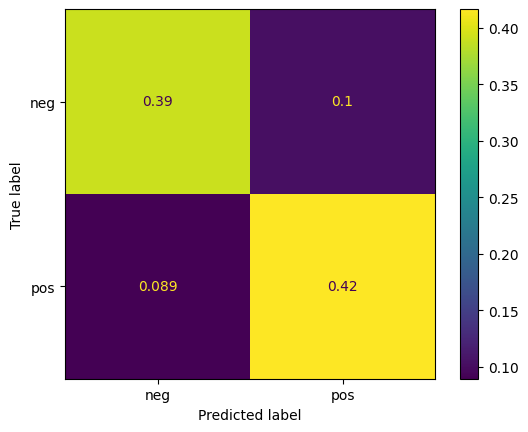

In [252]:
# create a confusion matrix
ConfusionMatrixDisplay.from_estimator(model_svm, X_test_bow, y_test, normalize='all')

In [253]:
# try
new_review = ['This movie looks so so.',
              'This movie looks good.',
              'Love it and hate it.',
              'it and it',
              'Hate it and love it.',
              'Hate it so much.']

new_review_bow = tfidf.transform(new_review)
model_svm.predict(new_review_bow)

array(['neg', 'neg', 'pos', 'pos', 'pos', 'neg'], dtype='<U3')

*Rgiht: 3/6.*

---



## **9.2. Decision tree**

In [254]:
# check F1 score of decision tree
f1_score(y_test, y_pred_dec, average=None, labels=movie_reviews.categories())

array([0.64296754, 0.65676077])

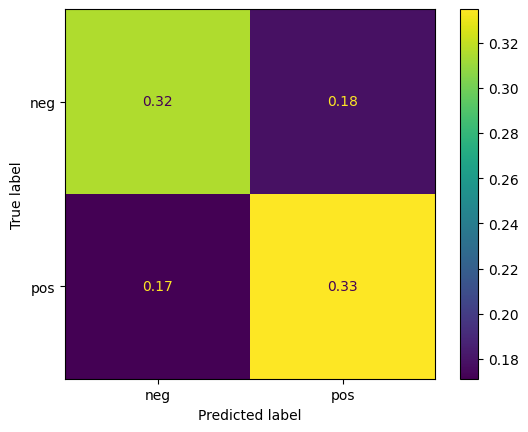

In [255]:
# create a confusion matrix
ConfusionMatrixDisplay.from_estimator(model_dec, X_test_bow, y_test, normalize='all')

In [256]:
# try
new_review = ['This movie looks so so.',
              'This movie looks good.',
              'Love it and hate it.',
              'it and it',
              'Hate it and love it.',
              'Hate it so much.']

new_review_bow = tfidf.transform(new_review)
model_dec.predict(new_review_bow)

array(['pos', 'pos', 'pos', 'pos', 'pos', 'pos'], dtype='<U3')

*Right: 4/6.*

---



## **9.3. Naive bayes**

In [257]:
# check F1 score of naive bayes
f1_score(y_test, y_pred_gnb, average=None, labels=movie_reviews.categories())

array([0.69073783, 0.71156662])

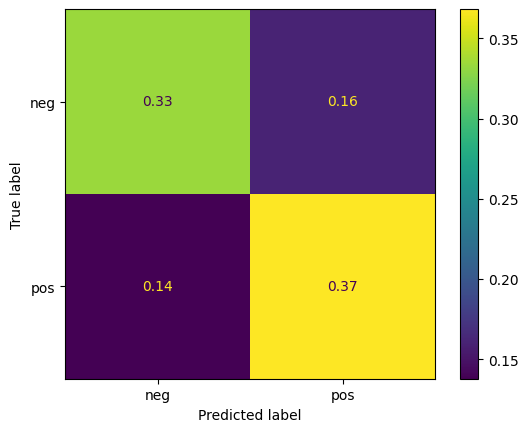

In [258]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb, normalize='all')
disp = ConfusionMatrixDisplay(cm, display_labels=movie_reviews.categories())
disp.plot()

In [259]:
# try
new_review = ['This movie looks so so.',
              'I like it.',
              'Love it and hate it.',
              'it and it',
              'Hate it and love it.',
              'Hate it so much.']

new_review_bow = tfidf.transform(new_review)
model_gnb.predict(new_review_bow.toarray())

array(['neg', 'neg', 'neg', 'pos', 'neg', 'neg'], dtype='<U3')

*Right: 3/6.*

---



## **9.4. Logistic Regression**

In [260]:
# check F1 score of logistic regressino
f1_score(y_test, y_pred_lg, average=None, labels=movie_reviews.categories())

array([0.79069767, 0.8       ])

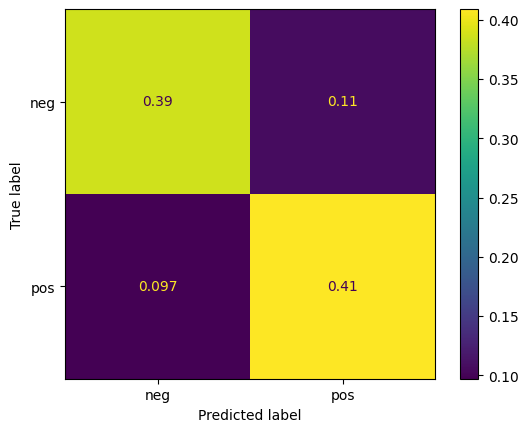

In [261]:
# create a confusion matrix
ConfusionMatrixDisplay.from_estimator(model_lg, X_test_bow, y_test, normalize='all')

In [262]:
# try
new_review = ['This movie looks so so.',
              'I like it.',
              'Love it and hate it.',
              'it and it',
              'Hate it and love it.',
              'Hate it so much.']

new_review_bow = tfidf.transform(new_review)
model_lg.predict(new_review_bow.toarray())

array(['neg', 'neg', 'neg', 'pos', 'neg', 'neg'], dtype='<U3')

*Right: 3/6.*

---



***Post analysis will be studied later.***

*1. LIME*

*2. Model coefficients and feature importance*

*3. Permutation importances*

---

